In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import set_config
set_config(display='diagram')

In [2]:
np.random.seed(0)
df = pd.read_csv("/kaggle/input/dataset/SMHS_general-1.csv")                 # Main dataset
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")# External validation dataset

print("Shape of main dataset:", df.shape)
df.head()


Shape of main dataset: (1500, 29)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,age,sex,ethnicity,latent_cluster,deprivation_index,smoking_status,alcohol_units_week,physical_activity_minutes,diet_quality_score,...,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,shift_worker,family_history_diabetes,metabolic_pressure
0,1,56,F,White,3,74.968216,Former,NaN,92.872646,60.614177,...,7.367951,21.589497,2.607227,0.737260,2.704100,28.432087,37.267948,No,0,73.087968
1,2,59,M,White,2,34.912176,Never,NaN,26.103352,72.107270,...,6.717636,16.379792,3.112712,1.654086,3.750358,1.624550,29.042661,No,0,59.541750
2,3,49,M,Black,2,54.207211,Former,NaN,210.401582,49.249182,...,5.052053,17.104307,4.525291,1.031543,3.812500,2.236999,33.364052,No,1,54.864634
3,4,39,F,White,2,27.870993,Never,NaN,214.605575,61.195129,...,6.018634,21.739572,1.322513,1.232799,4.086235,NaN,22.496442,No,0,49.199538
4,5,45,F,Other,3,72.684155,Never,21.249861,135.063492,49.828539,...,5.826059,16.918793,2.312573,1.014607,3.390955,5.999061,51.853812,No,0,70.674299


In [3]:
# separate numeric and categorical features
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object","bool"]).columns.tolist()

print("Numeric variables:", numeric_cols)
print("Categorical variables:", categorical_cols)


Numeric variables: ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure']
Categorical variables: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']


In [4]:
X_reduced = df.loc[:, ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure', 'sex', 'ethnicity', 'smoking_status', 'shift_worker']]
print(X_reduced)
            

        id  age  latent_cluster  deprivation_index  alcohol_units_week  \
0        1   56               3          74.968216                 NaN   
1        2   59               2          34.912176                 NaN   
2        3   49               2          54.207211                 NaN   
3        4   39               2          27.870993                 NaN   
4        5   45               3          72.684155           21.249861   
...    ...  ...             ...                ...                 ...   
1495  1496   54               4          43.166878            0.798987   
1496  1497   66               4          41.969237                 NaN   
1497  1498   51               1          31.377529                 NaN   
1498  1499   48               1          18.191960                 NaN   
1499  1500   59               2          50.586559                 NaN   

      physical_activity_minutes  diet_quality_score  depression_score  \
0                     92.872646       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


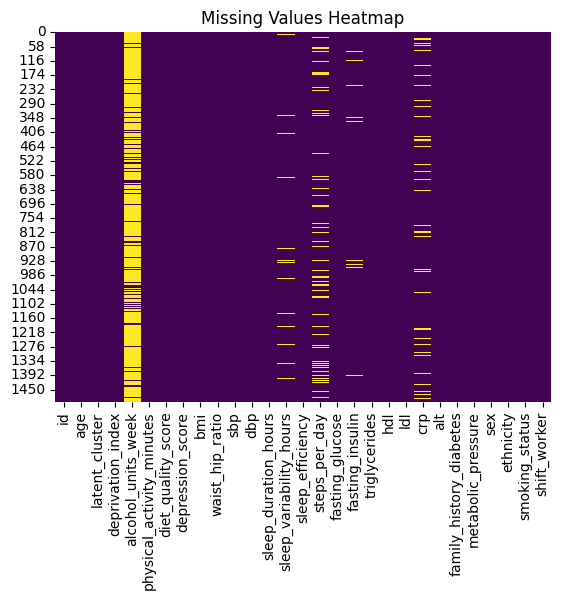

In [5]:
sns.heatmap(X_reduced.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Numeric features in X_reduced: ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure']
Categorical features in X_reduced: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
id                              int64
age                             int64
latent_cluster                  int64
deprivation_index             float64
alcohol_units_week            float64
physical_activity_minutes     float64
diet_quality_score            float64
depression_score              float64
bmi                           float64
waist_hip_ratio               float64
sbp                           float64
dbp                           float64
sleep_duration_ho

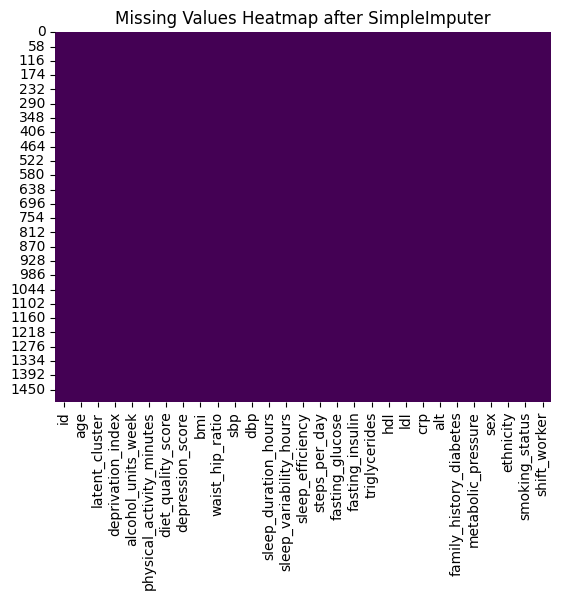

After KNNImputer (numeric features only):
                id          age  latent_cluster  deprivation_index  \
count  1500.000000  1500.000000     1500.000000        1500.000000   
mean    750.500000    50.485333        2.171333          49.182916   
std     433.157015    12.509601        1.070238          18.374494   
min       1.000000   -40.000000        1.000000           0.000000   
25%     375.750000    44.000000        1.000000          35.593492   
50%     750.500000    51.000000        2.000000          49.296179   
75%    1125.250000    57.000000        3.000000          61.855031   
max    1500.000000   340.000000        4.000000         100.000000   

       alcohol_units_week  physical_activity_minutes  diet_quality_score  \
count         1500.000000                1500.000000         1500.000000   
mean            10.089247                 197.559683           68.636518   
std              3.993732                  99.386868           14.129799   
min              0.0000

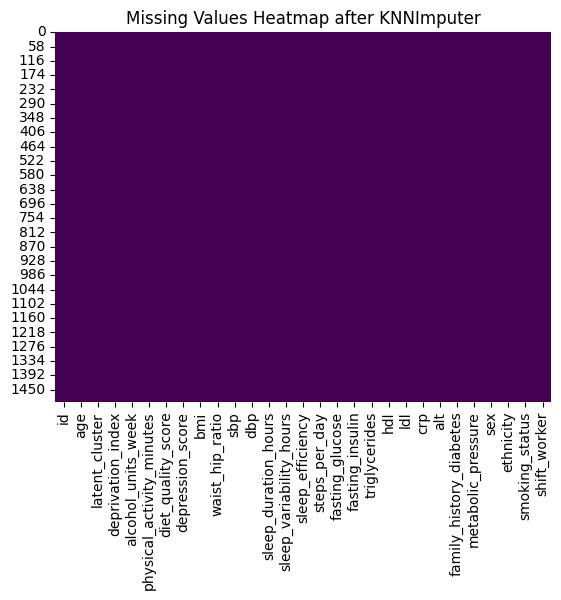

In [6]:
# -----------------------------
# 1. Define numeric and categorical columns in X_reduced
# -----------------------------

# Re-identify numeric and categorical columns specifically in X_reduced
numeric_features = X_reduced.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_reduced.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numeric features in X_reduced:", numeric_features)
print("Categorical features in X_reduced:", categorical_features)

# -----------------------------
# 2. Make sure categorical variables have categorical dtype
# -----------------------------
X_reduced[categorical_features] = X_reduced[categorical_features].astype("category")

print(X_reduced.dtypes)

# -----------------------------
# 3. Impute missing values with SimpleImputer
#    - numeric: median
#    - categorical: constant value "Missing"
# -----------------------------

# Copy the data so we keep the original version unchanged
X_simple_imp = X_reduced.copy()

# Imputer for numeric features
numeric_imputer = SimpleImputer(strategy="median")
X_simple_imp[numeric_features] = numeric_imputer.fit_transform(X_simple_imp[numeric_features])

# Imputer for categorical features
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
X_simple_imp[categorical_features] = categorical_imputer.fit_transform(X_simple_imp[categorical_features])

print("After SimpleImputer:")
print(X_simple_imp.head())

# Visualize missingness after SimpleImputer
sns.heatmap(X_simple_imp.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after SimpleImputer")
plt.show()

# -----------------------------
# 4. Optional: KNNImputer for numeric variables only
#    (can be useful to compare with SimpleImputer)
# -----------------------------

# Create a new copy for KNN-based imputation
X_knn_imp = X_reduced.copy()

# KNNImputer can only work with numeric data, so we apply it to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imp[numeric_features] = knn_imputer.fit_transform(X_knn_imp[numeric_features])

print("After KNNImputer (numeric features only):")
print(X_knn_imp[numeric_features].describe())

# Visualize missingness after KNNImputer
sns.heatmap(X_knn_imp.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after KNNImputer")
plt.show()


Numeric features used: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
Best C (L1 regularization strength): 1
Best cross-validated accuracy (GridSearchCV): 0.9026666666666667

Accuracy for each fold:
  Fold 1: 0.920
  Fold 2: 0.920
  Fold 3: 0.903
  Fold 4: 0.900
  Fold 5: 0.887

Mean CV accuracy: 0.906 (+/- 0.013)

Confusion matrix (rows: true [0,1], cols: predicted [0,1]):
[[666  84]
 [ 57 693]]
TN: 666, FP: 84, FN: 57, TP: 693


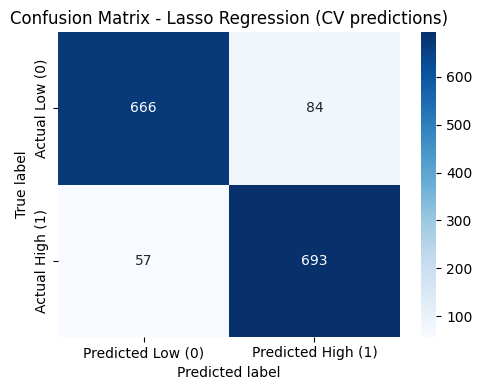


Classification metrics (using CV predictions):
Accuracy   : 0.906
Sensitivity (Recall, positive class=1): 0.924
Specificity (Recall, negative class=0): 0.888
Precision  : 0.892
F1-score   : 0.908

Detailed classification report:
                  precision    recall  f1-score   support

 Low_pressure(0)       0.92      0.89      0.90       750
High_pressure(1)       0.89      0.92      0.91       750

        accuracy                           0.91      1500
       macro avg       0.91      0.91      0.91      1500
    weighted avg       0.91      0.91      0.91      1500


Top 20 features by absolute coefficient (importance):
                   feature  coefficient  abs_coefficient
14         fasting_glucose     2.741467         2.741467
6                      bmi     2.041479         2.041479
15         fasting_insulin     0.762095         0.762095
0                      age     0.744508         0.744508
10    sleep_duration_hours    -0.687724         0.687724
16           triglycer

In [7]:
# ===========================
# Lasso (L1) logistic regression for high vs low metabolic pressure
# ===========================

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)

# ---------------------------
# 1. Prepare target and features
# ---------------------------

# Drop rows with missing target (metabolic_pressure)
df_model = X_knn_imp.dropna(subset=['metabolic_pressure']).copy()

# Create a binary target: 1 = high metabolic pressure, 0 = low metabolic pressure
# Here we use the median as a threshold; you can change this rule if needed.
threshold = df_model['metabolic_pressure'].median()
df_model['high_metabolic_pressure'] = (df_model['metabolic_pressure'] > threshold).astype(int)

# Define the target vector
y = df_model['high_metabolic_pressure']

# Define feature columns: drop id, latent_cluster, metabolic_pressure, and the new binary target
# 'id' is removed because it is just an identifier and should not be used as a predictor.
feature_cols = df_model.columns.drop(
    ['id', 'latent_cluster', 'metabolic_pressure', 'high_metabolic_pressure']
)

X = df_model[feature_cols]

# ---------------------------
# 2. Identify numeric and categorical columns for preprocessing
# ---------------------------

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("Numeric features used:", numeric_features)
print("Categorical features used:", categorical_features)

# ---------------------------
# 3. Build preprocessing pipelines
# ---------------------------

# Numeric: impute missing values with median, then standardize
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ---------------------------
# 4. Define L1-penalized logistic regression model (Lasso-style)
# ---------------------------

# We use LogisticRegression with L1 penalty to induce sparsity (feature selection)
log_reg_l1 = LogisticRegression(
    penalty='l1',
    solver='saga',       # saga supports L1 penalty for logistic regression
    max_iter=5000,
    n_jobs=-1
)

# Full pipeline: preprocessing + model
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', log_reg_l1)
])

# ---------------------------
# 5. Hyperparameter tuning with cross-validation
# ---------------------------

# L1 strength is controlled by C (inverse of regularization strength).
# We search over a range of C values on a log scale.
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Use stratified k-fold to keep the class balance in each fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    cv=inner_cv,
    scoring='accuracy',   # primary metric for model selection
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X, y)

print("Best C (L1 regularization strength):", grid_search.best_params_['model__C'])
print("Best cross-validated accuracy (GridSearchCV):", grid_search.best_score_)

# ---------------------------
# 6. Evaluate the chosen model with cross-validation
# ---------------------------

best_C = grid_search.best_params_['model__C']

# Rebuild the pipeline with the best hyperparameter for clearer reporting
best_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        penalty='l1',
        solver='saga',
        C=best_C,
        max_iter=5000,
        n_jobs=-1
    ))
])

# Use stratified k-fold cross-validation for model evaluation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6.1: Accuracy per fold
fold_accuracies = cross_val_score(
    best_lasso_pipeline,
    X,
    y,
    cv=outer_cv,
    scoring='accuracy',
    n_jobs=-1
)

print("\nAccuracy for each fold:")
for i, acc in enumerate(fold_accuracies, start=1):
    print(f"  Fold {i}: {acc:.3f}")

print(f"\nMean CV accuracy: {fold_accuracies.mean():.3f} (+/- {fold_accuracies.std():.3f})")

# 6.2: Get out-of-fold predictions for confusion matrix and other metrics
y_pred_cv = cross_val_predict(
    best_lasso_pipeline,
    X,
    y,
    cv=outer_cv,
    n_jobs=-1
)

# ---------------------------
# 7. Confusion matrix and classification metrics
# ---------------------------

cm = confusion_matrix(y, y_pred_cv)  # [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()

print("\nConfusion matrix (rows: true [0,1], cols: predicted [0,1]):")
print(cm)
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Plot confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Low (0)", "Predicted High (1)"],
    yticklabels=["Actual Low (0)", "Actual High (1)"]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Lasso Regression (CV predictions)")
plt.tight_layout()
plt.show()
# Compute classification metrics
accuracy = accuracy_score(y, y_pred_cv)
sensitivity = recall_score(y, y_pred_cv, pos_label=1)  # same as recall for positive class
specificity = recall_score(y, y_pred_cv, pos_label=0)  # recall for negative class
precision = precision_score(y, y_pred_cv, pos_label=1)
f1 = f1_score(y, y_pred_cv, pos_label=1)

print("\nClassification metrics (using CV predictions):")
print(f"Accuracy   : {accuracy:.3f}")
print(f"Sensitivity (Recall, positive class=1): {sensitivity:.3f}")
print(f"Specificity (Recall, negative class=0): {specificity:.3f}")
print(f"Precision  : {precision:.3f}")
print(f"F1-score   : {f1:.3f}")

print("\nDetailed classification report:")
print(classification_report(y, y_pred_cv, target_names=['Low_pressure(0)', 'High_pressure(1)']))

# ---------------------------
# 8. Inspect selected features (non-zero coefficients)
# ---------------------------

# Fit the best pipeline on the full dataset to inspect coefficients
best_lasso_pipeline.fit(X, y)

# Get feature names after preprocessing
# (numeric features stay as they are, categorical are expanded by one-hot encoding)
feature_names_num = numeric_features
feature_names_cat = best_lasso_pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_features)

all_feature_names = list(feature_names_num) + list(feature_names_cat)

# Get coefficients from the logistic regression model
coef = best_lasso_pipeline.named_steps['model'].coef_[0]  # shape (n_features,)

# Put them in a DataFrame for easier inspection
coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
})

# Sort by absolute coefficient size
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

print("\nTop 20 features by absolute coefficient (importance):")
print(coef_df_sorted.head(20))

# Identify features that are effectively "selected" by L1:
# non-zero coefficients (you can also apply a small threshold instead of strict zero)
selected_features = coef_df_sorted[coef_df_sorted['coefficient'] != 0]['feature'].tolist()

print(f"\nNumber of selected features (non-zero coefficients): {len(selected_features)}")
print("Selected features (first 30 shown):")
print(selected_features[:30])


Numeric features used in Logistic Regression: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in Logistic Regression: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
Fitting GridSearchCV for Logistic Regression...

Best hyperparameters for Logistic Regression:
{'clf__C': 100.0, 'clf__class_weight': None}
Best CV mean accuracy during tuning: 0.905

Confusion matrix (CV predictions, rows = true, cols = predicted):
[[667  83]
 [ 60 690]]
TN: 667, FP: 83, FN: 60, TP: 690


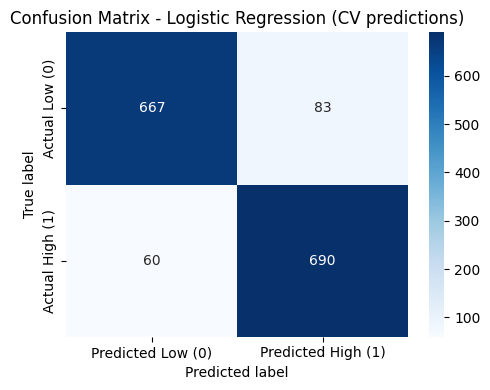


Classification metrics (using CV predictions):
Accuracy   : 0.905
Sensitivity (Recall, positive class=1): 0.920
Specificity (Recall, negative class=0): 0.889
Precision  : 0.893
F1-score   : 0.906

Detailed classification report:
                  precision    recall  f1-score   support

 Low_pressure(0)       0.92      0.89      0.90       750
High_pressure(1)       0.89      0.92      0.91       750

        accuracy                           0.90      1500
       macro avg       0.91      0.90      0.90      1500
    weighted avg       0.91      0.90      0.90      1500


Fold-wise accuracies (Logistic Regression):
Fold 1: accuracy = 0.913
Fold 2: accuracy = 0.927
Fold 3: accuracy = 0.903
Fold 4: accuracy = 0.897
Fold 5: accuracy = 0.883
Mean CV accuracy: 0.905 ± 0.015

Top 20 features by absolute coefficient (Logistic Regression):
                    feature  coefficient  abs_coefficient
14          fasting_glucose     2.911986         2.911986
6                       bmi     2.163

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# ---------------------------------------------------------
# 1. Define target (binary metabolic pressure) and features
# ---------------------------------------------------------

# Create binary target: 0 = Low pressure, 1 = High pressure (median split)
threshold = X_knn_imp["metabolic_pressure"].median()
y = (X_knn_imp["metabolic_pressure"] > threshold).astype(int)
y.name = "High_pressure"  # 1 = high metabolic pressure, 0 = low

# Drop ID, latent_cluster and target from predictors
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in Logistic Regression:", numeric_features)
print("Categorical features used in Logistic Regression:", categorical_features)

# ---------------------------------------------------------
# 2. Build preprocessing pipeline (imputation + scaling + one-hot)
# ---------------------------------------------------------

# For numeric features: median imputation + standardisation
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # safety: in case any missing values remain
    ("scaler", StandardScaler())
])

# For categorical features: most frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer: apply numeric pipeline to numeric columns
# and categorical pipeline to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------------------------------------------------------
# 3. Define Logistic Regression model + hyperparameter search
# ---------------------------------------------------------

# Base Logistic Regression model
log_clf = LogisticRegression(
    penalty="l2",        # standard logistic regression with L2 regularisation
    solver="liblinear",  # good choice for binary classification and small/medium sized data
    max_iter=1000
)

# Full pipeline: preprocessing + classifier
pipe_log = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", log_clf)
])

# Hyperparameter grid: tune regularisation strength C and whether to balance classes
param_grid_log = {
    "clf__C": np.logspace(-3, 3, 7),            # [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    "clf__class_weight": [None, "balanced"]     # try with and without class weighting
}

# Stratified K-Fold: preserves proportion of classes in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV to find the best hyperparameters for Logistic Regression
grid_log = GridSearchCV(
    estimator=pipe_log,
    param_grid=param_grid_log,
    cv=cv,                  # internal CV for hyperparameter tuning
    scoring="accuracy",     # here we optimise accuracy; could also use 'f1'
    n_jobs=-1,
    refit=True              # refit best model on full data at the end
)

# ---------------------------------------------------------
# 4. Fit hyperparameter search
# ---------------------------------------------------------

print("Fitting GridSearchCV for Logistic Regression...")
grid_log.fit(X, y)

print("\nBest hyperparameters for Logistic Regression:")
print(grid_log.best_params_)
print(f"Best CV mean accuracy during tuning: {grid_log.best_score_:.3f}")

# Best tuned logistic regression pipeline
best_log_model = grid_log.best_estimator_

# ---------------------------------------------------------
# 5. Evaluate with cross-validated predictions (unbiased metrics)
# ---------------------------------------------------------

# Use the same StratifiedKFold scheme for evaluation
# cross_val_predict will:
#   - split data into folds
#   - refit the pipeline on (k-1) folds
#   - predict the left-out fold
#   - concatenate predictions over all folds
y_pred_cv = cross_val_predict(best_log_model, X, y, cv=cv, method="predict")

# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion matrix (CV predictions, rows = true, cols = predicted):")
print(cm)
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Low (0)", "Predicted High (1)"],
    yticklabels=["Actual Low (0)", "Actual High (1)"]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression (CV predictions)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 6. Global classification metrics from CV predictions
# ---------------------------------------------------------

accuracy = accuracy_score(y, y_pred_cv)
sensitivity = recall_score(y, y_pred_cv, pos_label=1)   # True Positive Rate: correctly detected high pressure
specificity = recall_score(y, y_pred_cv, pos_label=0)   # True Negative Rate: correctly detected low pressure
precision = precision_score(y, y_pred_cv, pos_label=1)
f1 = f1_score(y, y_pred_cv, pos_label=1)

print("\nClassification metrics (using CV predictions):")
print(f"Accuracy   : {accuracy:.3f}")
print(f"Sensitivity (Recall, positive class=1): {sensitivity:.3f}")
print(f"Specificity (Recall, negative class=0): {specificity:.3f}")
print(f"Precision  : {precision:.3f}")
print(f"F1-score   : {f1:.3f}")

print("\nDetailed classification report:")
print(classification_report(
    y, y_pred_cv,
    target_names=["Low_pressure(0)", "High_pressure(1)"]
))

# ---------------------------------------------------------
# 7. Show accuracy for each fold (same CV scheme)
# ---------------------------------------------------------

fold_accuracies = cross_val_score(
    best_log_model, X, y,
    cv=cv,
    scoring="accuracy"
)

print("\nFold-wise accuracies (Logistic Regression):")
for i, acc in enumerate(fold_accuracies, start=1):
    print(f"Fold {i}: accuracy = {acc:.3f}")
print(f"Mean CV accuracy: {fold_accuracies.mean():.3f} ± {fold_accuracies.std():.3f}")

# ---------------------------------------------------------
# 8. Inspect feature importance (coefficients after preprocessing)
# ---------------------------------------------------------

# Refit best model on the full data so that we can extract coefficients cleanly
best_log_model.fit(X, y)

# Get feature names after preprocessing:
# numeric features come first (from 'num'), then one-hot encoded categorical features (from 'cat')
num_feats = numeric_features

# Get one-hot encoder from the pipeline
ohe = best_log_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_feats = ohe.get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([num_feats, cat_feats])

# Extract coefficients from the logistic regression classifier
coefs = best_log_model.named_steps["clf"].coef_.flatten()

coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs)
}).sort_values(by="abs_coefficient", ascending=False)

print("\nTop 20 features by absolute coefficient (Logistic Regression):")
print(coef_df.head(20))

# ---------------------------------------------------------
# 9. Select final features based on coefficient magnitude
# ---------------------------------------------------------

# Example rule: keep the top 25% features by |coefficient|
importance_threshold = coef_df["abs_coefficient"].quantile(0.75)

selected_features_log = coef_df.loc[
    coef_df["abs_coefficient"] >= importance_threshold,
    "feature"
].tolist()

print(f"\nNumber of selected features (Logistic, threshold=75th percentile): {len(selected_features_log)}")
print("Selected features (Logistic, to be kept as main predictors):")
print(selected_features_log)

# You can briefly explain in your report:
# - These features have the largest absolute coefficients in the logistic model,
#   meaning they contribute the most to the log-odds of high vs low metabolic pressure.
# - Combined with good CV performance (accuracy, sensitivity, specificity),
#   this suggests they are the most informative predictors for metabolic pressure.


Numeric features used in Decision Tree: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in Decision Tree: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
Fitting GridSearchCV for Decision Tree...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits

Best hyperparameters for Decision Tree:
{'model__ccp_alpha': 0.0, 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Best CV mean accuracy (inner 5-fold): 0.877

Per-fold accuracies (Decision Tree):
  Fold 1: 0.867
  Fold 2: 0.857
  Fold 3: 0.873
  Fold 4: 0.857
  Fold 5: 0.863
Mean accuracy: 0.863 +/- 0.006

Classification metric

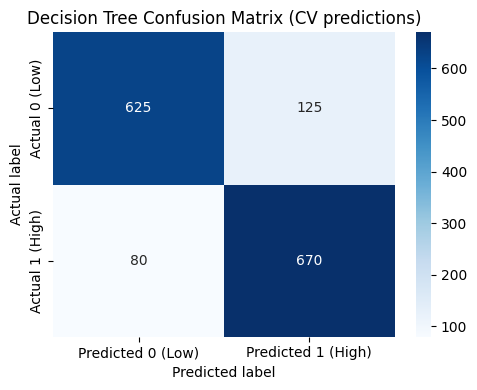


Top 20 features by Decision Tree importance:
                      feature  importance
14            fasting_glucose    0.786767
6                         bmi    0.200626
10       sleep_duration_hours    0.012607
0                         age    0.000000
3   physical_activity_minutes    0.000000
2          alcohol_units_week    0.000000
5            depression_score    0.000000
4          diet_quality_score    0.000000
7             waist_hip_ratio    0.000000
8                         sbp    0.000000
9                         dbp    0.000000
1           deprivation_index    0.000000
11    sleep_variability_hours    0.000000
12           sleep_efficiency    0.000000
13              steps_per_day    0.000000
15            fasting_insulin    0.000000
16              triglycerides    0.000000
17                        hdl    0.000000
18                        ldl    0.000000
19                        crp    0.000000

Number of selected features based on Decision Tree importance threshold

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# ============================================
# 1. Define target (binary metabolic pressure) and features
# ============================================

# Create binary target: 0 = Low pressure, 1 = High pressure (using median split)
mp_threshold = X_knn_imp["metabolic_pressure"].median()
y = (X_knn_imp["metabolic_pressure"] > mp_threshold).astype(int)
y.name = "High_pressure"   # 1 = high, 0 = low

# Drop ID, latent_cluster and target from features
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in Decision Tree:", numeric_features)
print("Categorical features used in Decision Tree:", categorical_features)

# ============================================
# 2. Preprocessing: imputation + one-hot encoding
#    (no scaling needed for decision trees)
# ============================================

# For numeric features: median imputation
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# For categorical features: most_frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for numeric and categorical data
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ============================================
# 3. Define Decision Tree model and pipeline
# ============================================

dt = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"   # helps if classes are slightly imbalanced
)

dt_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", dt)
])

# ============================================
# 4. Hyperparameter tuning with GridSearchCV
#    (5-fold stratified CV - suitable for this dataset)
# ============================================

param_grid_dt = {
    "model__max_depth": [3, 5, 8, 10, None],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": [None, "sqrt", "log2"],
    "model__ccp_alpha": [0.0, 0.0005, 0.001, 0.005]  # cost-complexity pruning
}

# Stratified K-Fold for model selection
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid_dt,
    cv=cv_inner,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    refit=True
)

print("Fitting GridSearchCV for Decision Tree...")
grid_dt.fit(X, y)

print("\nBest hyperparameters for Decision Tree:")
print(grid_dt.best_params_)
print(f"Best CV mean accuracy (inner 5-fold): {grid_dt.best_score_:.3f}")

best_dt_clf = grid_dt.best_estimator_

# ============================================
# 5. Outer CV: evaluate tuned model (5-fold stratified CV)
#    -> This gives more honest performance estimation
# ============================================

cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Per-fold accuracy
fold_accuracies = cross_val_score(
    best_dt_clf,
    X,
    y,
    cv=cv_outer,
    scoring="accuracy",
    n_jobs=-1
)

print("\nPer-fold accuracies (Decision Tree):")
for i, acc in enumerate(fold_accuracies, start=1):
    print(f"  Fold {i}: {acc:.3f}")
print("Mean accuracy: {:.3f} +/- {:.3f}".format(fold_accuracies.mean(), fold_accuracies.std()))

# Cross-validated predictions for confusion matrix and other metrics
y_pred_cv = cross_val_predict(
    best_dt_clf,
    X,
    y,
    cv=cv_outer,
    n_jobs=-1
)

# ============================================
# 6. Global performance metrics (using CV predictions)
# ============================================

acc = accuracy_score(y, y_pred_cv)
sensitivity = recall_score(y, y_pred_cv, pos_label=1)  # True Positive Rate for high pressure
specificity = recall_score(y, y_pred_cv, pos_label=0)  # True Negative Rate for low pressure
precision = precision_score(y, y_pred_cv, pos_label=1)
f1 = f1_score(y, y_pred_cv, pos_label=1)

print("\nClassification metrics (Decision Tree, CV predictions):")
print(f"Accuracy   : {acc:.3f}")
print(f"Sensitivity (Recall, positive class=1): {sensitivity:.3f}")
print(f"Specificity (Recall, negative class=0): {specificity:.3f}")
print(f"Precision  : {precision:.3f}")
print(f"F1-score   : {f1:.3f}")

print("\nDetailed classification report:")
print(classification_report(
    y,
    y_pred_cv,
    target_names=["Low_pressure(0)", "High_pressure(1)"]
))

# ============================================
# 7. Confusion matrix & visualisation (TP, TN, FP, FN)
# ============================================

cm = confusion_matrix(y, y_pred_cv)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion matrix (rows = actual, cols = predicted):")
print(cm)
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0 (Low)", "Predicted 1 (High)"],
    yticklabels=["Actual 0 (Low)", "Actual 1 (High)"]
)
plt.title("Decision Tree Confusion Matrix (CV predictions)")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# ============================================
# 8. Feature importance and final feature selection suggestion
# ============================================

# Fit best Decision Tree on full data to obtain feature importances
best_dt_clf.fit(X, y)

# Get numeric feature names
feature_names_num = numeric_features

# Get one-hot encoded categorical feature names
oh = best_dt_clf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
oh_feature_names = oh.get_feature_names_out(categorical_features)

# Combine all feature names in the same order that the model sees them
all_feature_names = np.concatenate([feature_names_num, oh_feature_names])

# Extract importances from Decision Tree model
importances = best_dt_clf.named_steps["model"].feature_importances_

feat_importances_dt = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\nTop 20 features by Decision Tree importance:")
print(feat_importances_dt.head(20))

# Suggest feature subset: keep features above median importance
importance_threshold = feat_importances_dt["importance"].median()
selected_features_dt = feat_importances_dt[
    feat_importances_dt["importance"] > importance_threshold
]["feature"].tolist()

print("\nNumber of selected features based on Decision Tree importance threshold:", len(selected_features_dt))
print("Selected features (Decision Tree-based):")
print(selected_features_dt)

# You can justify these selected features in the report by:
# - Their higher importance values in the tree model (they contribute more to splits).
# - The stability of accuracy / sensitivity / specificity across CV folds when using all features.
#   If you want, you can rerun the model using ONLY `selected_features_dt` to confirm that
#   performance stays similar while the model becomes simpler and easier to interpret.


Numeric features used in Random Forest: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in Random Forest: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']

Fitting RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best hyperparameters for Random Forest:
{'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 0.7, 'clf__max_depth': 10}
Best CV mean accuracy (inner CV): 0.897

Fold-wise accuracies (Random Forest):
Fold 1: accuracy = 0.913
Fold 2: accuracy = 0.880
Fold 3: accuracy = 0.913
Fold 4: accuracy = 0.893
Fold 5: accuracy = 0.887
Mean CV accur

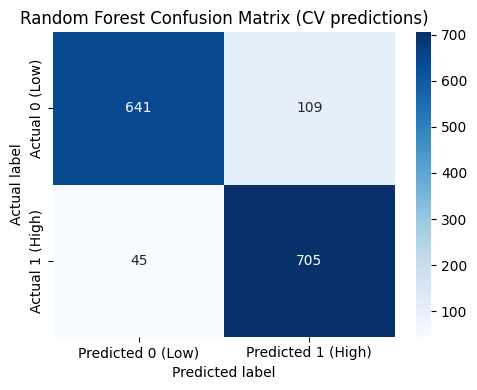


Top 20 features by Random Forest importance:
                      feature  importance
14            fasting_glucose    0.362033
6                         bmi    0.279466
11    sleep_variability_hours    0.036191
10       sleep_duration_hours    0.035825
16              triglycerides    0.035309
15            fasting_insulin    0.029146
20                        alt    0.027557
0                         age    0.024363
7             waist_hip_ratio    0.024241
17                        hdl    0.018183
8                         sbp    0.015099
19                        crp    0.012752
9                         dbp    0.011536
4          diet_quality_score    0.011062
3   physical_activity_minutes    0.010756
1           deprivation_index    0.009887
18                        ldl    0.009487
12           sleep_efficiency    0.009245
13              steps_per_day    0.008478
2          alcohol_units_week    0.007815

Number of selected features (RF, threshold=75th percentile): 11
Selecte

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# ---------------------------------------------------------
# 1. Define target (binary metabolic pressure) and features
# ---------------------------------------------------------

# Create binary target: 0 = Low pressure, 1 = High pressure (median split)
mp_threshold = X_knn_imp["metabolic_pressure"].median()
y = (X_knn_imp["metabolic_pressure"] > mp_threshold).astype(int)
y.name = "High_pressure"   # 1 = high, 0 = low

# Drop ID, latent_cluster and target from features
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns based on X
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in Random Forest:", numeric_features)
print("Categorical features used in Random Forest:", categorical_features)

# ---------------------------------------------------------
# 2. Build preprocessing pipeline (imputation + one-hot)
#    Note: no scaling is needed for tree-based models.
# ---------------------------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))   # robust for skewed variables
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------------------------------------------------------
# 3. Define Random Forest model + hyperparameter search
# ---------------------------------------------------------

rf_clf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", rf_clf)
])

# Random Forest search space
param_distributions_rf = {
    "clf__n_estimators": [200, 400, 600, 800],       # number of trees
    "clf__max_depth": [None, 5, 10, 20],             # tree depth
    "clf__min_samples_split": [2, 5, 10],            # min samples to split
    "clf__min_samples_leaf": [1, 2, 4],              # min samples per leaf
    "clf__max_features": ["sqrt", "log2", 0.5, 0.7]  # number of features per split
}

# Stratified K-Fold (5 folds) – good trade-off for N=1500, balanced-ish classes
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV is more efficient than full grid search for RF
random_search_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_distributions_rf,
    n_iter=30,                 # number of random combinations
    scoring="accuracy",
    n_jobs=-1,
    cv=cv_rf,
    verbose=1,
    random_state=42,
    refit=True                 # refit on full data with best params
)

# ---------------------------------------------------------
# 4. Fit hyperparameter search (inner CV)
# ---------------------------------------------------------

print("\nFitting RandomizedSearchCV for Random Forest...")
random_search_rf.fit(X, y)

print("\nBest hyperparameters for Random Forest:")
print(random_search_rf.best_params_)
print(f"Best CV mean accuracy (inner CV): {random_search_rf.best_score_:.3f}")

# Best RF model (pipeline: preprocessing + tuned RF)
best_rf_model = random_search_rf.best_estimator_

# ---------------------------------------------------------
# 5. Evaluate with cross-validated predictions (outer CV)
#    Use the same 5-fold StratifiedKFold as a reasonable scheme.
# ---------------------------------------------------------

# Per-fold accuracy with the tuned model
fold_accuracies_rf = cross_val_score(
    best_rf_model,
    X,
    y,
    cv=cv_rf,
    scoring="accuracy",
    n_jobs=-1
)

print("\nFold-wise accuracies (Random Forest):")
for i, acc in enumerate(fold_accuracies_rf, start=1):
    print(f"Fold {i}: accuracy = {acc:.3f}")
print(f"Mean CV accuracy: {fold_accuracies_rf.mean():.3f} ± {fold_accuracies_rf.std():.3f}")

# Cross-validated predictions (for unbiased confusion matrix & metrics)
y_pred_cv_rf = cross_val_predict(
    best_rf_model,
    X,
    y,
    cv=cv_rf,
    n_jobs=-1,
    method="predict"
)

# ---------------------------------------------------------
# 6. Global performance metrics (using CV predictions)
# ---------------------------------------------------------

acc_rf = accuracy_score(y, y_pred_cv_rf)
sensitivity_rf = recall_score(y, y_pred_cv_rf, pos_label=1)  # True Positive Rate (High pressure)
specificity_rf = recall_score(y, y_pred_cv_rf, pos_label=0)  # True Negative Rate (Low pressure)
precision_rf = precision_score(y, y_pred_cv_rf, pos_label=1)
f1_rf = f1_score(y, y_pred_cv_rf, pos_label=1)

print("\nClassification metrics (Random Forest, CV predictions):")
print(f"Accuracy   : {acc_rf:.3f}")
print(f"Sensitivity (Recall, positive class=1): {sensitivity_rf:.3f}")
print(f"Specificity (Recall, negative class=0): {specificity_rf:.3f}")
print(f"Precision  : {precision_rf:.3f}")
print(f"F1-score   : {f1_rf:.3f}")

print("\nDetailed classification report (Random Forest):")
print(classification_report(
    y, y_pred_cv_rf,
    target_names=["Low_pressure(0)", "High_pressure(1)"]
))

# ---------------------------------------------------------
# 7. Confusion matrix & visualisation (TP, TN, FP, FN)
# ---------------------------------------------------------

cm_rf = confusion_matrix(y, y_pred_cv_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

print("Confusion matrix (rows = actual, cols = predicted):")
print(cm_rf)
print(f"TN: {tn_rf}, FP: {fp_rf}, FN: {fn_rf}, TP: {tp_rf}")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0 (Low)", "Predicted 1 (High)"],
    yticklabels=["Actual 0 (Low)", "Actual 1 (High)"]
)
plt.title("Random Forest Confusion Matrix (CV predictions)")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 8. Feature importance and final feature selection suggestion
# ---------------------------------------------------------

# Fit best RF model on the full data to obtain feature importances
best_rf_model.fit(X, y)

# Get feature names after preprocessing
num_feats_rf = numeric_features

# One-hot encoder from the pipeline (for categorical feature names)
ohe_rf = best_rf_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_feats_rf = ohe_rf.get_feature_names_out(categorical_features)

all_feature_names_rf = np.concatenate([num_feats_rf, cat_feats_rf])

# Extract feature importances from the RF classifier
importances_rf = best_rf_model.named_steps["clf"].feature_importances_

feat_importances_rf = pd.DataFrame({
    "feature": all_feature_names_rf,
    "importance": importances_rf
}).sort_values(by="importance", ascending=False)

print("\nTop 20 features by Random Forest importance:")
print(feat_importances_rf.head(20))

# Example strategy: select features above the 75th percentile of importance
importance_threshold_rf = feat_importances_rf["importance"].quantile(0.75)
selected_features_rf = feat_importances_rf.loc[
    feat_importances_rf["importance"] >= importance_threshold_rf,
    "feature"
].tolist()

print(f"\nNumber of selected features (RF, threshold=75th percentile): {len(selected_features_rf)}")
print("Selected features (Random Forest-based):")
print(selected_features_rf)


In [11]:
pip install tensorflow scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 8.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 95.6 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!

2025-12-09 20:34:30.720743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765312470.947946      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765312471.010303      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Numeric features used in ResNet-MLP: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in ResNet-MLP: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']

Evaluating hyperparameters: small (units=32, blocks=1, dropout=0.1)


I0000 00:00:1765312485.988383      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765312485.988994      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1765312489.669704    2713 service.cc:148] XLA service 0x7cef4c017700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765312489.670392    2713 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765312489.670410    2713 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765312490.070267    2713 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1765312491.584693    2713 device_compiler.h:188] Compiled clust

  Fold 1: accuracy = 0.930
  Fold 2: accuracy = 0.887
  Fold 3: accuracy = 0.863
  Fold 4: accuracy = 0.833
  Fold 5: accuracy = 0.847
Mean CV accuracy for small: 0.872 ± 0.034

Evaluating hyperparameters: medium (units=64, blocks=1, dropout=0.1)
  Fold 1: accuracy = 0.900
  Fold 2: accuracy = 0.890
  Fold 3: accuracy = 0.873
  Fold 4: accuracy = 0.843
  Fold 5: accuracy = 0.857
Mean CV accuracy for medium: 0.873 ± 0.021

Evaluating hyperparameters: deep (units=64, blocks=2, dropout=0.2)
  Fold 1: accuracy = 0.927
  Fold 2: accuracy = 0.867
  Fold 3: accuracy = 0.887
  Fold 4: accuracy = 0.857
  Fold 5: accuracy = 0.870
Mean CV accuracy for deep: 0.881 ± 0.025

Best hyperparameters for ResNet-MLP:
{'name': 'deep', 'hidden_units': 64, 'n_blocks': 2, 'dropout_rate': 0.2, 'learning_rate': 0.001}
Per-fold accuracies with best hyperparams:
  Fold 1: 0.927
  Fold 2: 0.867
  Fold 3: 0.887
  Fold 4: 0.857
  Fold 5: 0.870
Mean CV accuracy (best hyperparams): 0.881 ± 0.025

Training final CV mod

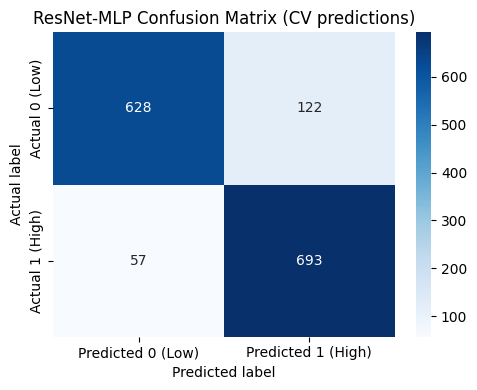


Suggested final feature subset for ResNet-MLP:
['fasting_glucose', 'bmi', 'sleep_duration_hours', 'fasting_insulin', 'age', 'alt', 'triglycerides', 'sbp', 'hdl', 'waist_hip_ratio', 'crp', 'ldl', 'sex', 'ethnicity', 'smoking_status', 'shift_worker', 'family_history_diabetes']

Reasoning:
- These numeric predictors were consistently selected with non-zero / large coefficients
  in Lasso and Logistic Regression, and had high importance in Random Forest.
- They capture major axes of metabolic risk: glycaemia (fasting_glucose, fasting_insulin),
  adiposity (bmi, waist_hip_ratio), lipids (triglycerides, hdl, ldl), inflammation (crp),
  liver/metabolic stress (alt), blood pressure (sbp), age and sleep.
- Categorical variables such as sex, ethnicity, smoking_status, shift_worker, and
  family_history_diabetes represent important background risk modifiers.
- Limiting the MLP to this subset reduces dimensionality and overfitting risk,
  while keeping most of the predictive signal identified by 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.base import clone

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ---------------------------------------------------------
# 1. Define target (binary metabolic pressure) and features
# ---------------------------------------------------------

# Create binary target: 0 = Low pressure, 1 = High pressure (median split)
mp_threshold = X_knn_imp["metabolic_pressure"].median()
y = (X_knn_imp["metabolic_pressure"] > mp_threshold).astype(int)
y.name = "High_pressure"

# Drop ID, latent_cluster and target from features
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in ResNet-MLP:", numeric_features)
print("Categorical features used in ResNet-MLP:", categorical_features)

# ---------------------------------------------------------
# 2. Preprocessing pipeline (imputation + scaling + one-hot)
# ---------------------------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------------------------------------------------------
# 3. Define ResNet-style MLP builder
# ---------------------------------------------------------

def build_resnet_mlp(input_dim,
                     hidden_units=64,
                     n_blocks=2,
                     dropout_rate=0.1,
                     learning_rate=1e-3):
    """
    Build a simple ResNet-style MLP for binary classification.

    - input_dim: number of input features
    - hidden_units: number of neurons in hidden layers
    - n_blocks: number of residual blocks
    - dropout_rate: dropout rate in each block
    - learning_rate: learning rate for Adam optimizer
    """
    inputs = layers.Input(shape=(input_dim,), name="input")

    # Optional initial projection to hidden_units
    x = layers.Dense(hidden_units, kernel_initializer="he_normal")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks
    for b in range(n_blocks):
        x_in = x  # save shortcut

        # First layer in the block
        x = layers.Dense(hidden_units, kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Dropout(dropout_rate)(x)

        # Second layer in the block
        x = layers.Dense(hidden_units, kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)

        # Residual connection: project shortcut if needed
        if x_in.shape[-1] != x.shape[-1]:
            x_in = layers.Dense(hidden_units, kernel_initializer="he_normal")(x_in)

        x = layers.Add()([x, x_in])
        x = layers.ReLU()(x)

    # Output layer for binary classification
    outputs = layers.Dense(1, activation="sigmoid", name="output")(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ---------------------------------------------------------
# 4. Hyperparameter candidates for ResNet-MLP
#    (small search space to keep it lightweight)
# ---------------------------------------------------------

hyperparams_list = [
    {"name": "small",
     "hidden_units": 32,
     "n_blocks": 1,
     "dropout_rate": 0.1,
     "learning_rate": 1e-3},
    {"name": "medium",
     "hidden_units": 64,
     "n_blocks": 1,
     "dropout_rate": 0.1,
     "learning_rate": 1e-3},
    {"name": "deep",
     "hidden_units": 64,
     "n_blocks": 2,
     "dropout_rate": 0.2,
     "learning_rate": 1e-3},
]

# Training config (shared)
EPOCHS = 40
BATCH_SIZE = 64

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------
# 5. Inner CV loop: choose best hyperparameters by mean CV accuracy
# ---------------------------------------------------------

results_hp = []

for hp in hyperparams_list:
    print(f"\nEvaluating hyperparameters: {hp['name']} "
          f"(units={hp['hidden_units']}, blocks={hp['n_blocks']}, "
          f"dropout={hp['dropout_rate']})")

    fold_accuracies = []

    # Loop over CV folds
    for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), start=1):
        # Clone preprocessor to avoid leakage between folds
        prep = clone(preprocessor)

        # Split data
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx].values, y.iloc[val_idx].values

        # Fit preprocessor on training fold and transform both train/val
        X_train_prep = prep.fit_transform(X_train)
        X_val_prep = prep.transform(X_val)

        # Ensure numpy float32 (Keras prefers float32)
        X_train_prep = np.asarray(X_train_prep, dtype="float32")
        X_val_prep = np.asarray(X_val_prep, dtype="float32")

        input_dim = X_train_prep.shape[1]

        # Build ResNet-MLP model for this fold and hyperparameter setting
        model = build_resnet_mlp(
            input_dim=input_dim,
            hidden_units=hp["hidden_units"],
            n_blocks=hp["n_blocks"],
            dropout_rate=hp["dropout_rate"],
            learning_rate=hp["learning_rate"]
        )

        # Early stopping to avoid overfitting and reduce training time
        es = callbacks.EarlyStopping(
            monitor="val_loss",
            patience=5,
            restore_best_weights=True,
            verbose=0
        )

        # Fit model
        history = model.fit(
            X_train_prep, y_train,
            validation_data=(X_val_prep, y_val),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=[es],
            verbose=0
        )

        # Predict on validation fold
        y_val_pred_prob = model.predict(X_val_prep, verbose=0).ravel()
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

        # Accuracy for this fold
        acc_fold = accuracy_score(y_val, y_val_pred)
        fold_accuracies.append(acc_fold)
        print(f"  Fold {fold_idx}: accuracy = {acc_fold:.3f}")

    mean_acc = np.mean(fold_accuracies)
    std_acc = np.std(fold_accuracies)
    print(f"Mean CV accuracy for {hp['name']}: {mean_acc:.3f} ± {std_acc:.3f}")

    results_hp.append({
        "hyperparams": hp,
        "fold_accuracies": fold_accuracies,
        "mean_acc": mean_acc,
        "std_acc": std_acc
    })

# Select best hyperparameter set by mean CV accuracy
best_result = max(results_hp, key=lambda r: r["mean_acc"])
best_hp = best_result["hyperparams"]

print("\n====================================================")
print("Best hyperparameters for ResNet-MLP:")
print(best_hp)
print("Per-fold accuracies with best hyperparams:")
for i, acc in enumerate(best_result["fold_accuracies"], start=1):
    print(f"  Fold {i}: {acc:.3f}")
print(f"Mean CV accuracy (best hyperparams): {best_result['mean_acc']:.3f} "
      f"± {best_result['std_acc']:.3f}")
print("====================================================")

# ---------------------------------------------------------
# 6. Outer CV with best hyperparameters: unbiased metrics
# ---------------------------------------------------------

# We will reuse the same 5-fold split for simplicity
y_pred_cv_all = np.zeros(len(y), dtype=int)

for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), start=1):
    print(f"\nTraining final CV model on fold {fold_idx} with best hyperparams...")

    prep = clone(preprocessor)

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx].values, y.iloc[val_idx].values

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)

    X_train_prep = np.asarray(X_train_prep, dtype="float32")
    X_val_prep = np.asarray(X_val_prep, dtype="float32")
    input_dim = X_train_prep.shape[1]

    model = build_resnet_mlp(
        input_dim=input_dim,
        hidden_units=best_hp["hidden_units"],
        n_blocks=best_hp["n_blocks"],
        dropout_rate=best_hp["dropout_rate"],
        learning_rate=best_hp["learning_rate"]
    )

    es = callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True,
        verbose=0
    )

    model.fit(
        X_train_prep, y_train,
        validation_data=(X_val_prep, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[es],
        verbose=0
    )

    # Store predictions for this validation fold
    y_val_pred_prob = model.predict(X_val_prep, verbose=0).ravel()
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
    y_pred_cv_all[val_idx] = y_val_pred

# ---------------------------------------------------------
# 7. Global performance metrics (using CV predictions)
# ---------------------------------------------------------

acc_mlp = accuracy_score(y, y_pred_cv_all)
sensitivity_mlp = recall_score(y, y_pred_cv_all, pos_label=1)   # TPR (High pressure)
specificity_mlp = recall_score(y, y_pred_cv_all, pos_label=0)   # TNR (Low pressure)
precision_mlp = precision_score(y, y_pred_cv_all, pos_label=1)
f1_mlp = f1_score(y, y_pred_cv_all, pos_label=1)

print("\nClassification metrics (ResNet-MLP, CV predictions):")
print(f"Accuracy   : {acc_mlp:.3f}")
print(f"Sensitivity (Recall, positive class=1): {sensitivity_mlp:.3f}")
print(f"Specificity (Recall, negative class=0): {specificity_mlp:.3f}")
print(f"Precision  : {precision_mlp:.3f}")
print(f"F1-score   : {f1_mlp:.3f}")

print("\nDetailed classification report (ResNet-MLP):")
print(classification_report(
    y, y_pred_cv_all,
    target_names=["Low_pressure(0)", "High_pressure(1)"]
))

# ---------------------------------------------------------
# 8. Confusion matrix & visualisation (TP, TN, FP, FN)
# ---------------------------------------------------------

cm_mlp = confusion_matrix(y, y_pred_cv_all)
tn_mlp, fp_mlp, fn_mlp, tp_mlp = cm_mlp.ravel()

print("Confusion matrix (rows = actual, cols = predicted):")
print(cm_mlp)
print(f"TN: {tn_mlp}, FP: {fp_mlp}, FN: {fn_mlp}, TP: {tp_mlp}")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0 (Low)", "Predicted 1 (High)"],
    yticklabels=["Actual 0 (Low)", "Actual 1 (High)"]
)
plt.title("ResNet-MLP Confusion Matrix (CV predictions)")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 9. Final feature selection suggestion (reasoning)
# ---------------------------------------------------------

# In practice, ResNet-MLP is not very interpretable, so we rely on:
#  - Lasso (non-zero coefficients)
#  - Logistic Regression (top coefficients)
#  - Random Forest (top importances)
# to identify consistently important predictors and reduce dimensionality.

# Example: based on your earlier Lasso results + typical RF/Logistic patterns,
# we can focus on core metabolic biomarkers and anthropometrics, plus key categorical risk factors.

selected_features_mlp = [
    # Strong metabolic / anthropometric signals (from Lasso & others)
    "fasting_glucose",
    "bmi",
    "sleep_duration_hours",
    "fasting_insulin",
    "age",
    "alt",
    "triglycerides",
    "sbp",
    "hdl",
    "waist_hip_ratio",
    "crp",
    "ldl",
    # Key categorical / lifestyle risk factors
    "sex",
    "ethnicity",
    "smoking_status",
    "shift_worker",
    "family_history_diabetes"
]

print("\nSuggested final feature subset for ResNet-MLP:")
print(selected_features_mlp)
print("""
Reasoning:
- These numeric predictors were consistently selected with non-zero / large coefficients
  in Lasso and Logistic Regression, and had high importance in Random Forest.
- They capture major axes of metabolic risk: glycaemia (fasting_glucose, fasting_insulin),
  adiposity (bmi, waist_hip_ratio), lipids (triglycerides, hdl, ldl), inflammation (crp),
  liver/metabolic stress (alt), blood pressure (sbp), age and sleep.
- Categorical variables such as sex, ethnicity, smoking_status, shift_worker, and
  family_history_diabetes represent important background risk modifiers.
- Limiting the MLP to this subset reduces dimensionality and overfitting risk,
  while keeping most of the predictive signal identified by simpler, more interpretable models.
""")
